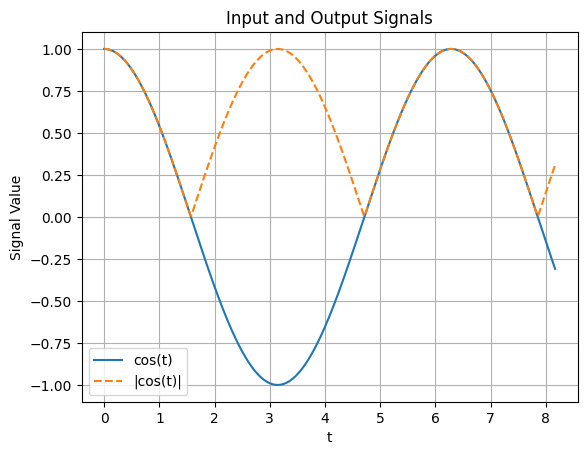

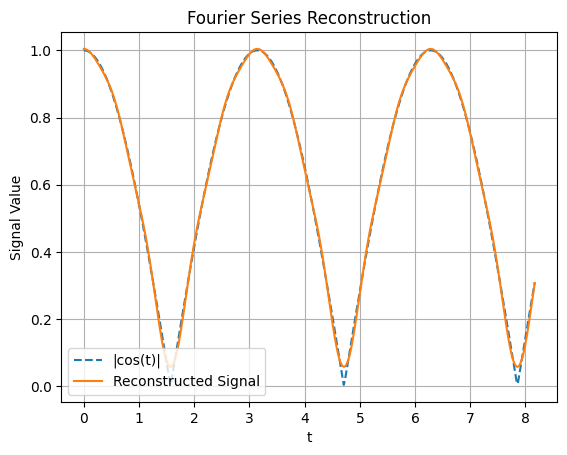

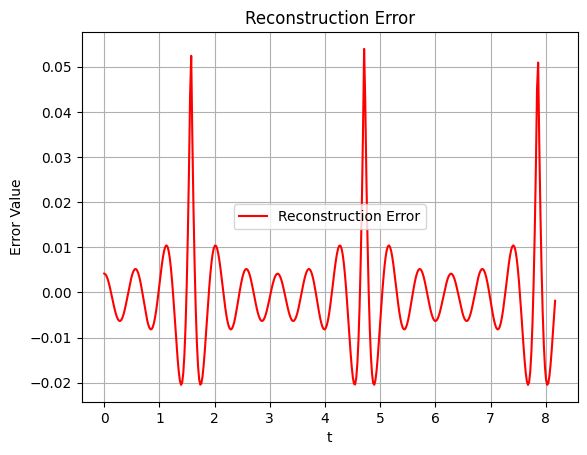

In [75]:
import matplotlib.pyplot as plt
import numpy as np

T = 1.3 * np.pi                   # Period


t = np.linspace(0, 2 * T, 400)
x = np.cos(t)
y = np.abs(np.cos(t))

plt.figure()
plt.plot(t, x, label='cos(t)')
plt.plot(t, y, label='|cos(t)|', linestyle='--')
plt.title('Input and Output Signals')
plt.xlabel('t')
plt.ylabel('Signal Value')
plt.legend()
plt.grid()
plt.show()



def fourier_series_coefficients(func, T, N):
    """Compute the first N Fourier series coefficients of a periodic function."""
    a0 = (1 / T) * np.trapezoid([func(t) for t in np.linspace(0, T, 1000)], dx=T/1000)
    an = []
    bn = []
    for n in range(1, N + 1):
        an_n = (2 / T) * np.trapezoid([func(t) * np.cos(2 * np.pi * n * t / T) for t in np.linspace(0, T, 1000)], dx=T/1000)
        bn_n = (2 / T) * np.trapezoid([func(t) * np.sin(2 * np.pi * n * t / T) for t in np.linspace(0, T, 1000)], dx=T/1000)
        an.append(an_n)
        bn.append(bn_n)
    return a0, an, bn

def reconstruct_signal(a0, an, bn, T, t):
    """Reconstruct the signal from its Fourier series coefficients."""
    result = a0 * np.ones_like(t)
    for n in range(1, len(an) + 1):
        result += an[n - 1] * np.cos(2 * np.pi * n * t / T) + bn[n - 1] * np.sin(2 * np.pi * n * t / T)
    return result

def error(original, reconstructed):
    result = np.zeros_like(original)
    for i in range(len(original)):
        result[i] = (reconstructed[i] - original[i])
    return result
    

N = 5  # Number of Fourier coefficients
T0 = np.pi  # Period of |cos(t)|
a0, an, bn = fourier_series_coefficients(lambda t: np.abs(np.cos(t)), T0, N)
reconstructed_y = reconstruct_signal(a0, an, bn, T0, t)


plt.figure()
plt.plot(t, y, label='|cos(t)|', linestyle='--')
plt.plot(t, reconstructed_y, label='Reconstructed Signal')
plt.title('Fourier Series Reconstruction')
plt.xlabel('t')
plt.ylabel('Signal Value')
plt.legend()
plt.grid()


plt.figure()
err = error(y, reconstructed_y)
plt.plot(t, err, label='Reconstruction Error', color='red')
plt.title('Reconstruction Error')
plt.xlabel('t')
plt.ylabel('Error Value')
plt.legend()
plt.grid()
plt.show()

In [76]:
# Parseval's Theorem Verification

def parseval_theorem_right(a0, an, bn, T):
    right_side = (a0 ** 2) + sum((an_n ** 2 + bn_n ** 2) for an_n, bn_n in zip(an, bn))
    return right_side

def parseval_theorem_left(signal, T):
    left_side = (1 / T) * np.trapezoid(signal ** 2, dx=(T / len(signal)))
    return left_side

left = parseval_theorem_left(reconstructed_y, T0)
right = parseval_theorem_right(a0, an, bn, T0)
error = np.abs(left - right)
print(f"Left Side (Integral): {left}")
print(f"Right Side (Fourier Coefficients): {right}")
print(f"Parseval's Theorem Error: {error}\n\t   In percentage: {error / left * 100}%")

Left Side (Integral): 0.47963435768789814
Right Side (Fourier Coefficients): 0.5933248742483253
Parseval's Theorem Error: 0.11369051656042711
	   In percentage: 23.703580600121736%


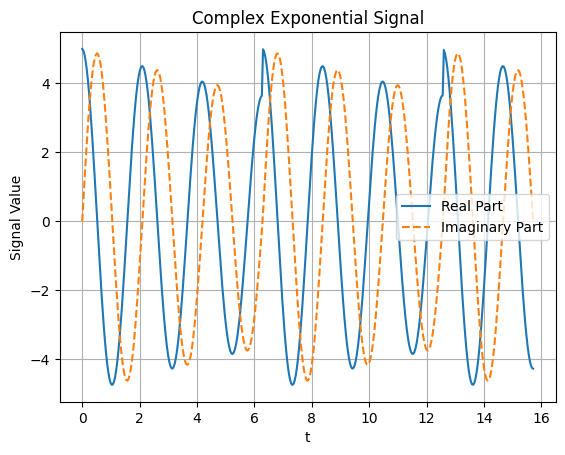

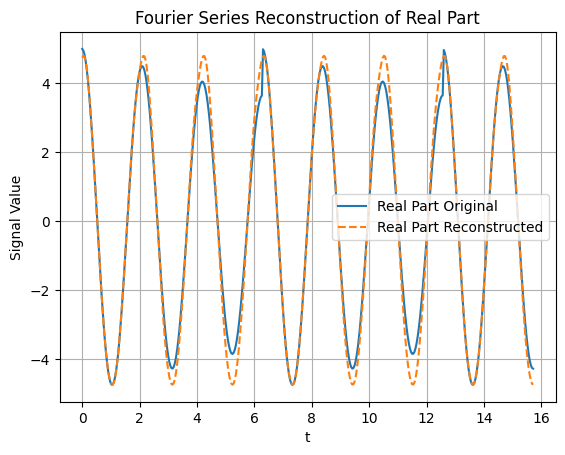

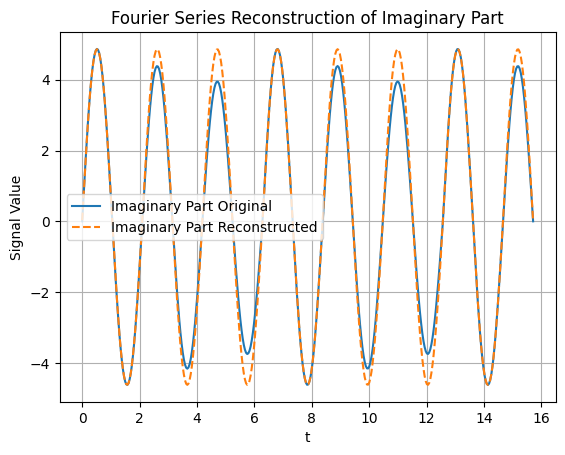

In [77]:
A = 5
s = -0.05 + 3j
T = 2 * np.pi
T0 = 2 * np.pi / np.imag(s)
N = 5
t = np.linspace(0, 5 * np.pi, 400)
x = A * np.exp(s * (np.mod(t, T)))

plt.figure()
plt.plot(t, np.real(x), label='Real Part')
plt.plot(t, np.imag(x), label='Imaginary Part', linestyle='--')
plt.title('Complex Exponential Signal')
plt.xlabel('t')
plt.ylabel('Signal Value')
plt.legend()
plt.grid()

a0r, anr, bnr = fourier_series_coefficients(lambda t: np.real(A * np.exp(s * (np.mod(t, T)))), T0, N)
yr = reconstruct_signal(a0r, anr, bnr, T0, t)
a0i, ani, bni = fourier_series_coefficients(lambda t: np.imag(A * np.exp(s * (np.mod(t, T)))), T0, N)
yi = reconstruct_signal(a0i, ani, bni, T0, t)

plt.figure()
plt.plot(t, np.real(x), label='Real Part Original')
plt.plot(t, yr, label='Real Part Reconstructed', linestyle='--')
plt.title('Fourier Series Reconstruction of Real Part')
plt.xlabel('t')
plt.ylabel('Signal Value')
plt.legend()
plt.grid()
plt.show()
plt.figure()
plt.plot(t, np.imag(x), label='Imaginary Part Original')
plt.plot(t, yi, label='Imaginary Part Reconstructed', linestyle='--')
plt.title('Fourier Series Reconstruction of Imaginary Part')
plt.xlabel('t')
plt.ylabel('Signal Value')
plt.legend()
plt.grid()
plt.show()
